#### Problema de negócio visualizado

O banco deseja melhorar seu processo de análise e aprovação de crédito pessoal, identificando padrões que influenciam na decisão de concessão de empréstimos. Atualmente, muitos pedidos são avaliados manualmente ou com base em critérios simples, o que pode resultar em aprovações indevidas ou recusas injustificadas. O objetivo deste projeto é utilizar técnicas de Machine Learning para prever, com base em características  dos clientes, a probabilidade de um empréstimo pessoal ser aprovado ou não.

#### Dicionário dos dados
O dataset é da Kaggle e possui 14 colunas e 5000 linhas.

- ID: Identificador do cliente.
- Age : Idade (em anos).
- Experience : Experiência de trabalho (em anos).
- Income : Renda anual (em milhares).
- ZipCode: Código postal da residência.
- Family : Número de membros da família.
- CCAvg: Média do gasto mensal com cartão de crédito (em milhares).
- Education: Nível de escolaridade do cliente.
    - 1: Graduação.
    - 2: Mestrado.
    - 3: Nível Avançado.
- Mortgage: Valor do financiamento, se existente (em milhares).
- Securities Account : Se o cliente tem ou não ativos ou títulos do banco.
- CD Account : Se o cliente tem ou não certificado de depósito bancário do banco.
- Online : Se o cliente tem ou não acesso a funcionalidades do Internet Banking.
- Credit Card : Se o cliente tem ou não cartão de crédito do banco.
- Personal Loan: Se o empréstimo pessoal foi ou não aprovado.
    - 0: empréstimo pessoal aprovado.
    - 1: empréstimo pessoal não aprovado.

#### Import das bibliotecas

In [217]:
# Manipulação e visualização de dados
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Pré-processamento de dados 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer


# Classificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import RidgeClassifier

# Métricas de desempenho 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# import shap

# Controle de warnings 
import warnings
warnings.filterwarnings('ignore')

##### Funções

In [218]:
def converter_colunas_para_string(df, colunas):
    """
    Converte as colunas especificadas para string no DataFrame.
    
    Parâmetros:
    - df: DataFrame do pandas
    - colunas: lista com os nomes das colunas a serem convertidas
    
    Retorna:
    - DataFrame com as colunas convertidas
    """
    for col in colunas:
        if col in df.columns:
            df[col] = df[col].astype(str)
        else:
            print(f"Coluna '{col}' não foi encontrada no DataFrame.")
    return df

In [219]:
def map_education(X):
    X = X.copy()
    X['Education'] = X['Education'].replace({
        1: 'Graduacao',
        2: 'Mestrado',
        3: 'Nível Avançado'
    })
    return X

#### Carregando os dados


In [220]:
df = pd.read_parquet("../data/dados_banco.parquet")

#### Analisando dados ausentes

In [221]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP.Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
dtype: int64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### Observações
- Não há dados repetidos, igualmente dados faltantes nas colunas observadas.
- Algumas colunas (como, por ex, Education, Mortgage, Credit Card) foram classificadas como dados numéricos, mas representam categorias, e precisarão ser tratadas no futuro para se encaixarem nas categorias específicas.

In [223]:
#colunas_para_converter = ['ZIP.Code', 'Education', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']
# df = converter_colunas_para_string(df, colunas_para_converter)

##### Exploração dos dados

In [224]:
df.head(5)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [225]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Principais Insights Estatísticos

- **Age**: Idade média de 45 anos, variando de 23 a 67.

- **Experience**: Média de 20 anos, com valores negativos que indicam dados inválidos.

- **Income**: Renda média de US$ 73,7 mil, com grande variação e teto de US$ 224 mil.

- **Family**: Tamanho médio da família é 2,4 membros (entre 1 e 4).

- **CCAvg**: Gasto médio com cartão é US$ 1.938/mês, podendo chegar a US$ 10 mil.

- **Mortgage**: Metade dos clientes não possui financiamento; alguns têm até US$ 635 mil.

In [226]:
print(df['Personal.Loan'].value_counts(normalize=True) * 100)

0    90.4
1     9.6
Name: Personal.Loan, dtype: float64


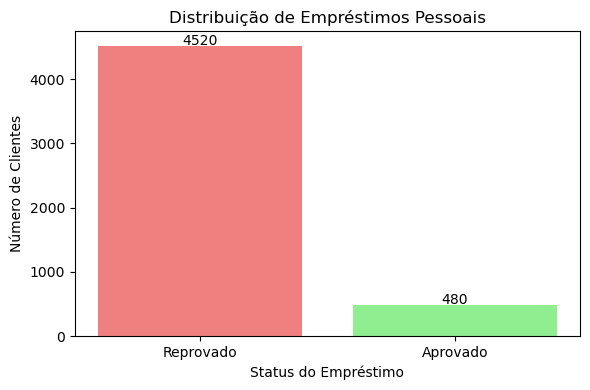

In [227]:
loan_counts = df['Personal.Loan'].value_counts().sort_index()

# Rótulos (0 = Reprovado, 1 = Aprovado)
labels = ['Reprovado', 'Aprovado']

# Cores
colors = ['lightcoral', 'lightgreen']

# Plotando o gráfico
plt.figure(figsize=(6, 4))
plt.bar(labels, loan_counts, color=colors)

# Adicionando rótulos e título
plt.title('Distribuição de Empréstimos Pessoais')
plt.ylabel('Número de Clientes')
plt.xlabel('Status do Empréstimo')

# Adicionando os valores no topo das barras
for i, value in enumerate(loan_counts):
    plt.text(i, value + 20, str(value), ha='center')

plt.tight_layout()
plt.show()

- Relação de 90% de reprovados para 10% de aprovados, o que pode inviesar o nosso modelo

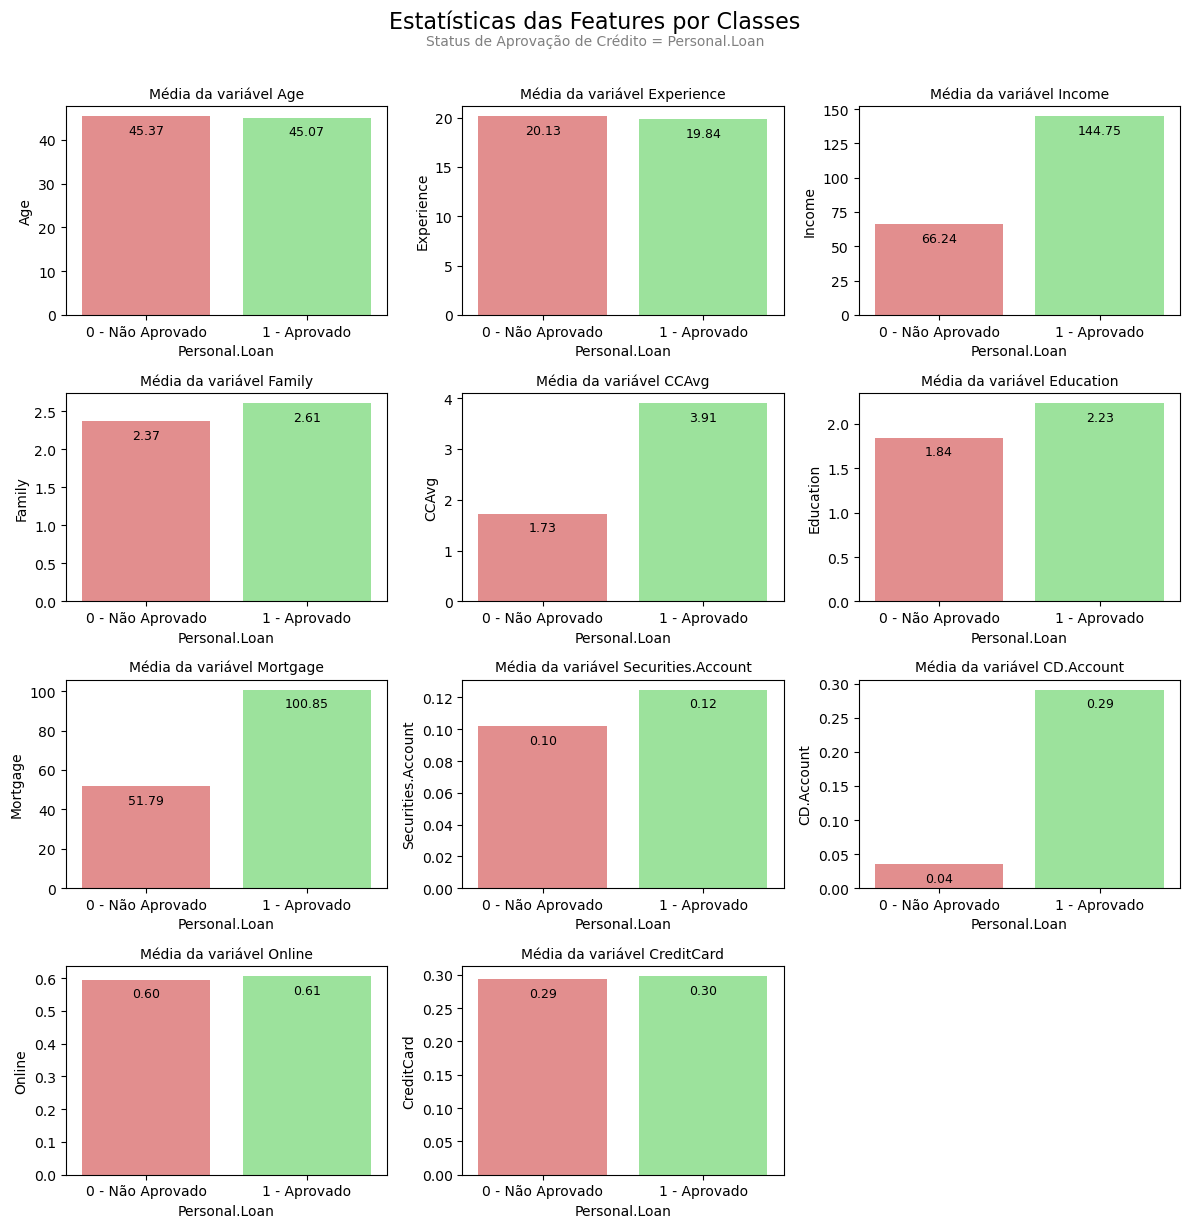

In [228]:
colunas = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities.Account', 'CD.Account', 'Online', 'CreditCard']

custom_colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(12, 12))
plt.suptitle('Estatísticas das Features por Classes', y=1.02, fontsize=16)
plt.figtext(0.5, 0.99, 'Status de Aprovação de Crédito = Personal.Loan', ha='center', fontsize=10, color='gray')

for i, q in enumerate(colunas, 1):
    plt.subplot(4, 3, i)
    estatisticas_media = df.groupby('Personal.Loan')[q].mean().reset_index()
    estatisticas_media = estatisticas_media.sort_values('Personal.Loan')

    ax = sns.barplot(data=estatisticas_media, x='Personal.Loan', y=q, palette=custom_colors)

    for container in ax.containers:
        ax.bar_label(container, labels=[f'{v.get_height():.2f}' for v in container], fontsize=9, padding=-15)

    plt.xticks(ticks=[0, 1], labels=['0 - Não Aprovado', '1 - Aprovado'])
    plt.title(f'Média da variável {q}', fontsize=10)

plt.tight_layout()
plt.show()

- Variáveis como CCAvg, Education, CD.Account, Mortgage e Income tem valor médio bastante distante para "Aprovados" do que "Não aprovados", o que pode nos indicar que essas variáveis podem ser decisivas para a decisão final.

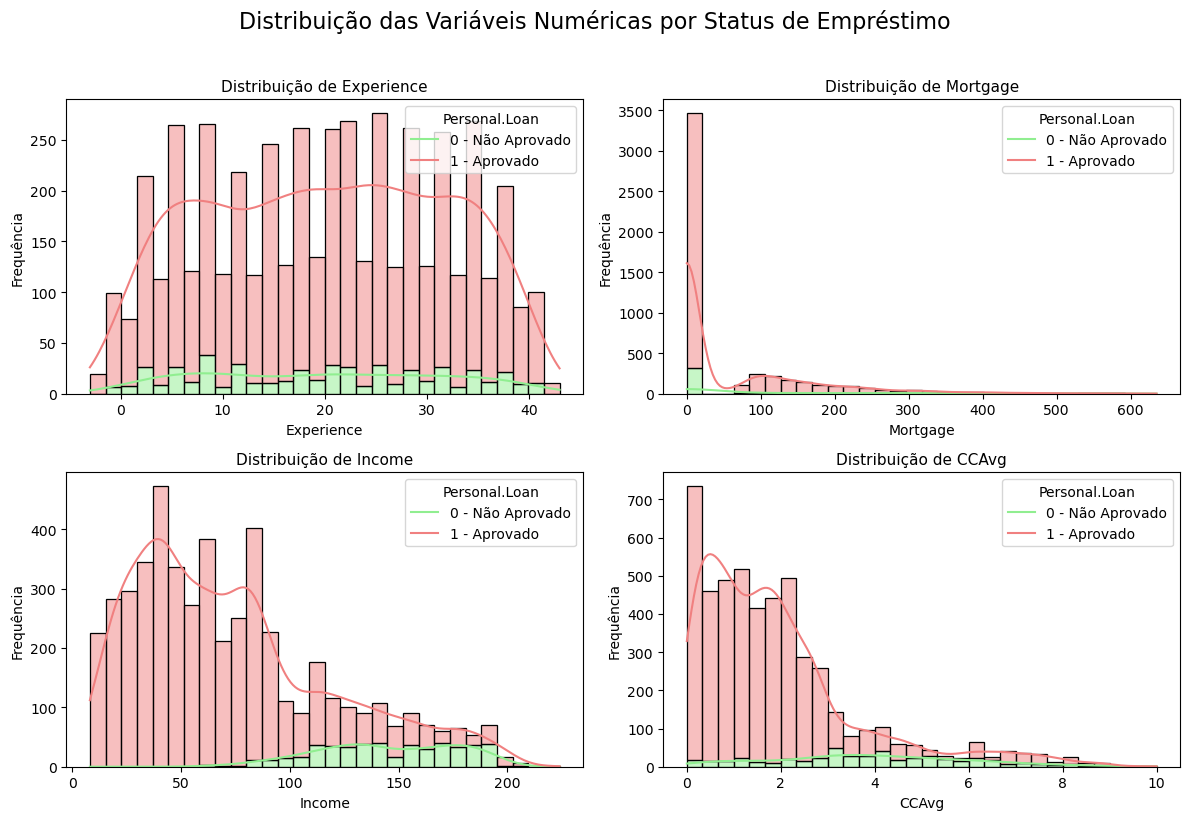

In [229]:
colunas_hist = ['Experience', 'Mortgage', 'Income', 'CCAvg']

custom_palette = {0: 'lightcoral', 1: 'lightgreen'}

plt.figure(figsize=(12, 8))
plt.suptitle('Distribuição das Variáveis Numéricas por Status de Empréstimo', fontsize=16, y=1.02)

for i, col in enumerate(colunas_hist, 1):
    plt.subplot(2, 2, i)
    
    sns.histplot(
        data=df,
        x=col,
        hue='Personal.Loan',
        palette=custom_palette,
        bins=30,
        kde=True,
        multiple='stack'
    )
    
    plt.title(f'Distribuição de {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    
    plt.grid(False)

    plt.legend(title='Personal.Loan', labels=['0 - Não Aprovado', '1 - Aprovado'])

plt.tight_layout()
plt.show()

- Income: Clientes aprovados tendem a ter renda maior — o que pode ser um dos principais critérios.
- CCAvg: Gastos maiores com cartão também parecem estar correlacionados com aprovações.

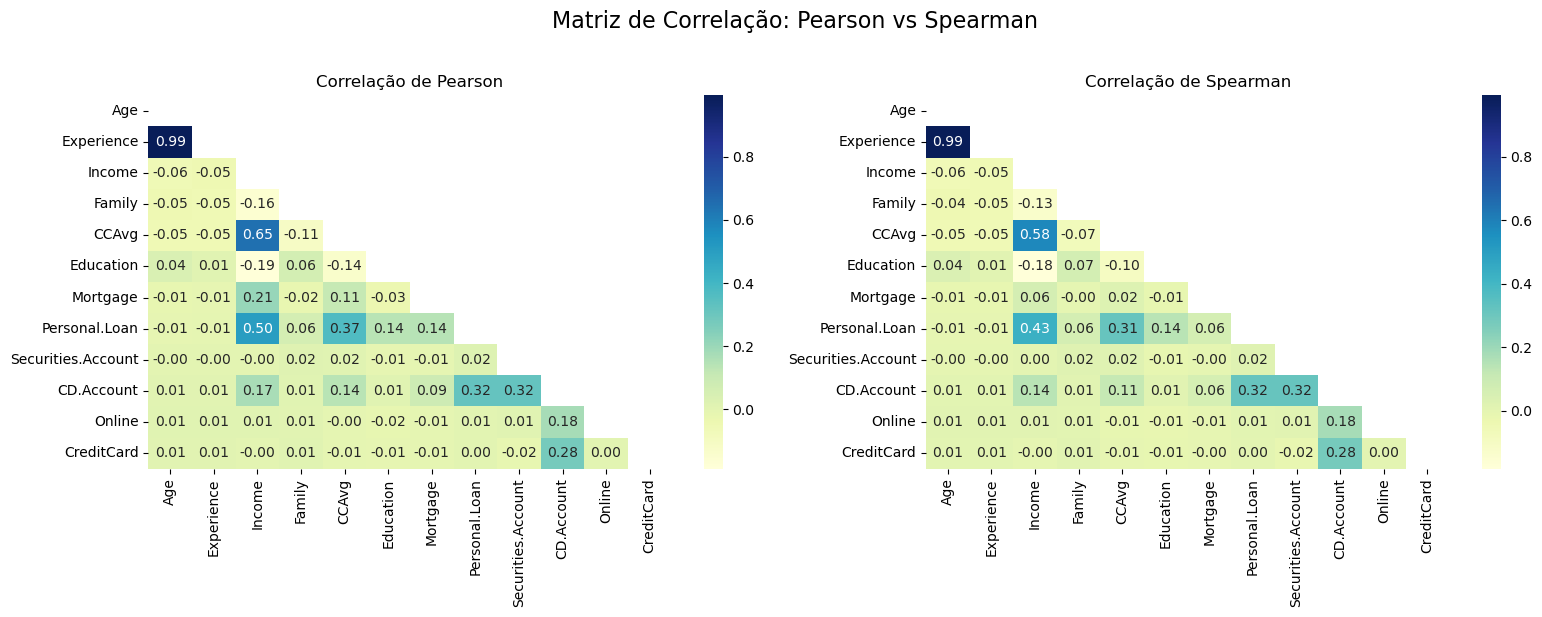

In [230]:
dados = df.drop(columns=['ID', 'ZIP.Code'])

correlacoes = {
    'Pearson': dados.corr(method='pearson'),
    'Spearman': dados.corr(method='spearman')
}

mask = np.triu(np.ones_like(dados.corr(), dtype=bool))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Matriz de Correlação: Pearson vs Spearman", fontsize=16, y=1.02)

for ax, (tipo, matriz) in zip(axes, correlacoes.items()):
    sns.heatmap(
        matriz,
        annot=True,
        cmap='YlGnBu',
        fmt='.2f',
        mask=mask,
        xticklabels=matriz.columns,
        yticklabels=matriz.columns,
        ax=ax
    )
    ax.set_title(f'Correlação de {tipo}')

plt.tight_layout()
plt.show()

- Observa-se por meio de Spellman, que:
    -  Age e Experience são fortes, mas isso é esperado, visto que quanto mais velho, mais experiência laboral o usuário tem.
    - CCAvg e Income tem relações positiva e considerável, o que é esperado, pois quanto maior a renda, maior os gastos mensais de uma pessoa.
    AA variável Personal.Loan é fortemente relacionada com Income, CCAvg e CD.Account, possivelmente nos explicando melhor que a aprovação tem maior dependência nessas variáveis.
    - Education e Income terem correlação negativa nos indica algum padrão que não comum na vida real ou em bases completas, que é quem tem educação alta ter income baixo.

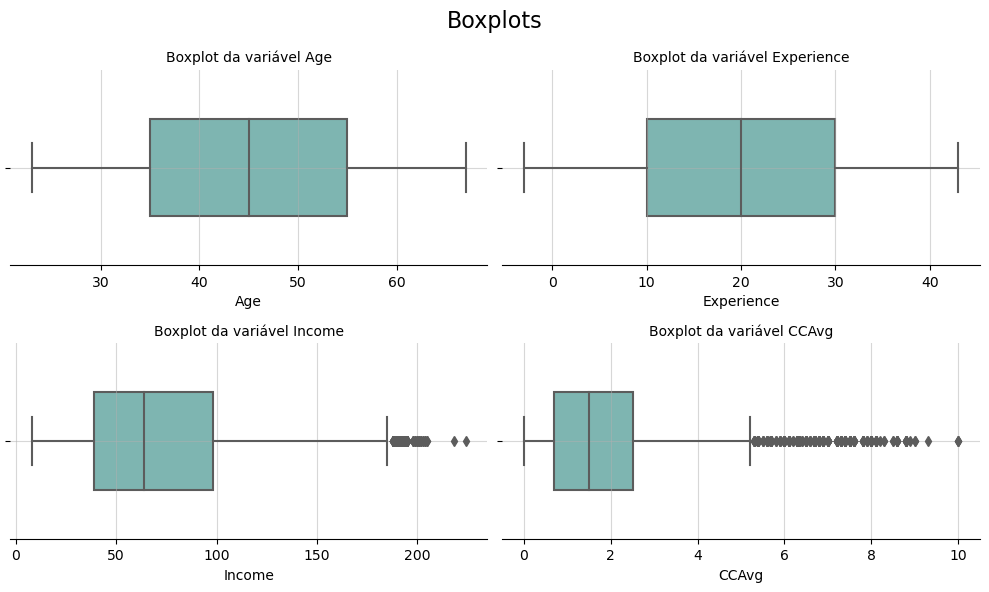

In [231]:
colunas_num_continuas = ['Age', 'Experience', 'Income', 'CCAvg']

plt.figure(figsize=(10, 6))
plt.suptitle('Boxplots', fontsize=16)

for i, q in enumerate(colunas_num_continuas, 1):
    paleta = sns.color_palette('YlGnBu_d')
    plt.subplot(2, 2, i)

    sns.boxplot(data=df, x=q, color=paleta[0], orient='h', width=0.5)

    sns.despine(left=True)
    plt.title(f'Boxplot da variável {q}', fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

- Income apresenta assimetria à direita e diversos outliers acima de 175 mil, sugerindo clientes de alta renda.
- CCAvg tem concentração de clientes com gastos baixos (< 3 mil) e muitos outliers extremos acima de 5 mil, o que indica comportamento financeiro muito variado entre os clientes.

##### Pré-processamento
- 1 - Divisão da base entre treino e teste (80/20)
- 2 - Codificiar a Education por meio de OHE (One Hot Encoder)
- 3 - Robust Scaler foi escolhido, por não ser afetado por outliers como Sandard Scaler e MinMaxScaler

In [232]:
# 2 - Codificar a variável Education
education_transformer = FunctionTransformer(map_education, validate=False)
df = education_transformer.fit_transform(df)

In [233]:
X = df.drop(columns = ['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = df['Personal.Loan']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [235]:
print(f'X_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'X_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

X_train - Proporção da classe 0: 0.904
y_train - Proporção da classe 1: 0.096
X_test - Proporção da classe 0: 0.904
y_test - Proporção da classe 1: 0.096


In [236]:
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
categorical_features = ['Education']

In [237]:
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [238]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [239]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

##### Treino 1 - Com a base geral


🔍 LogisticRegression 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       904
           1       0.83      0.70      0.76        96

    accuracy                           0.96      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.95      0.96      0.96      1000

ROC AUC score: 0.9550


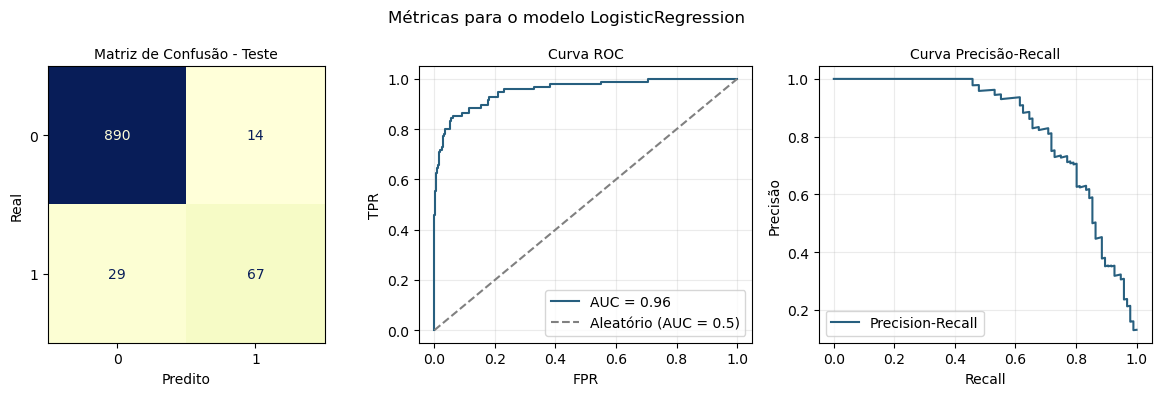

🔍 DecisionTree 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.91      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9742


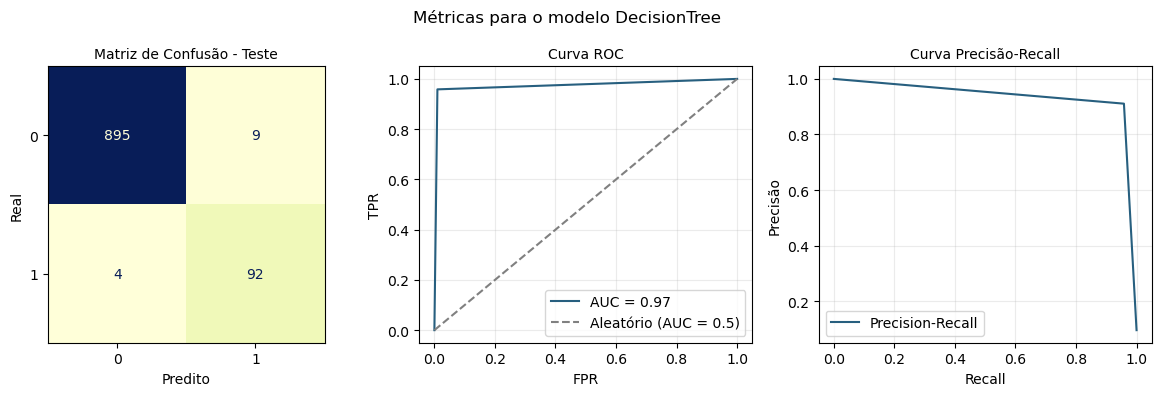

🔍 KNN 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.97      0.69      0.80        96

    accuracy                           0.97      1000
   macro avg       0.97      0.84      0.89      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9479


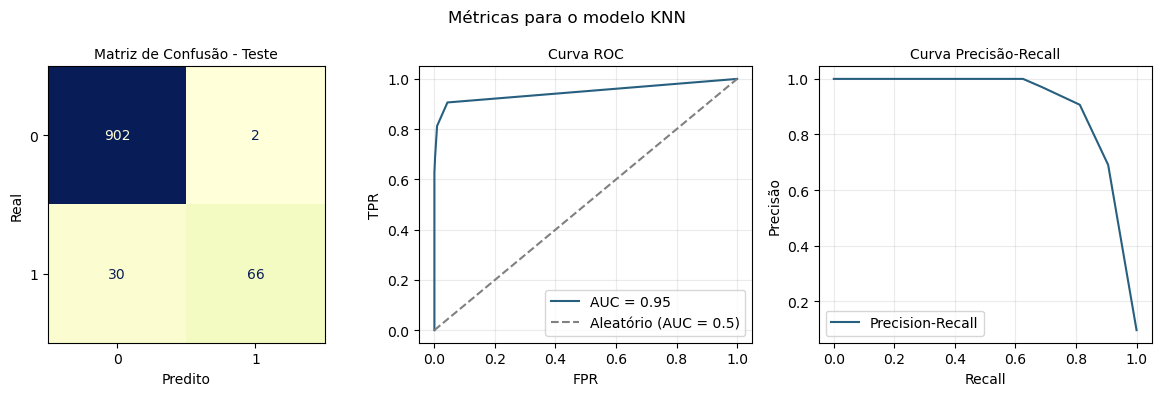

🔍 AdaBoost 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.84      0.83      0.84        96

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9848


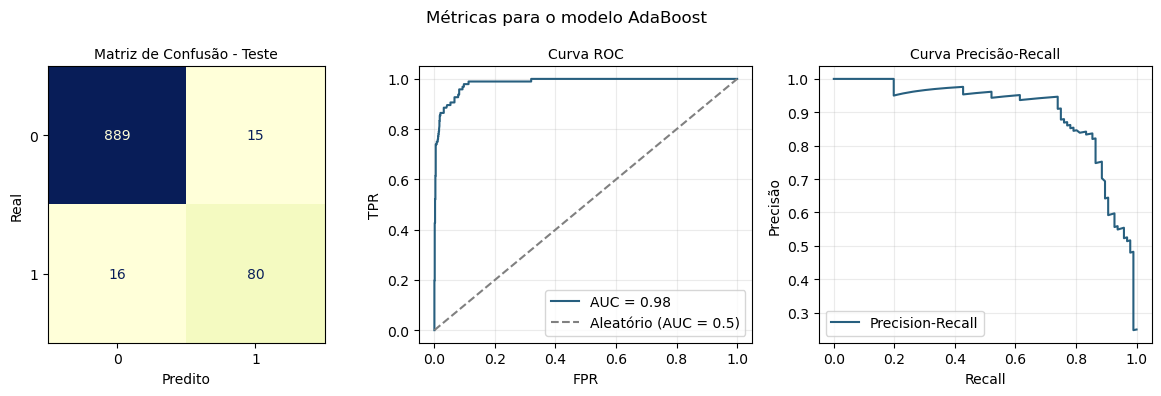

🔍 RandomForest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9985


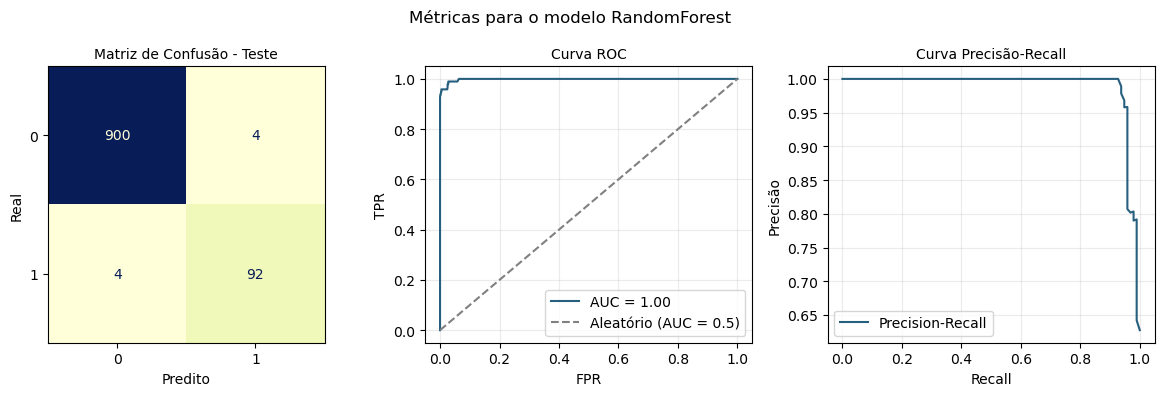

🔍 XGBoost 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.94      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9989


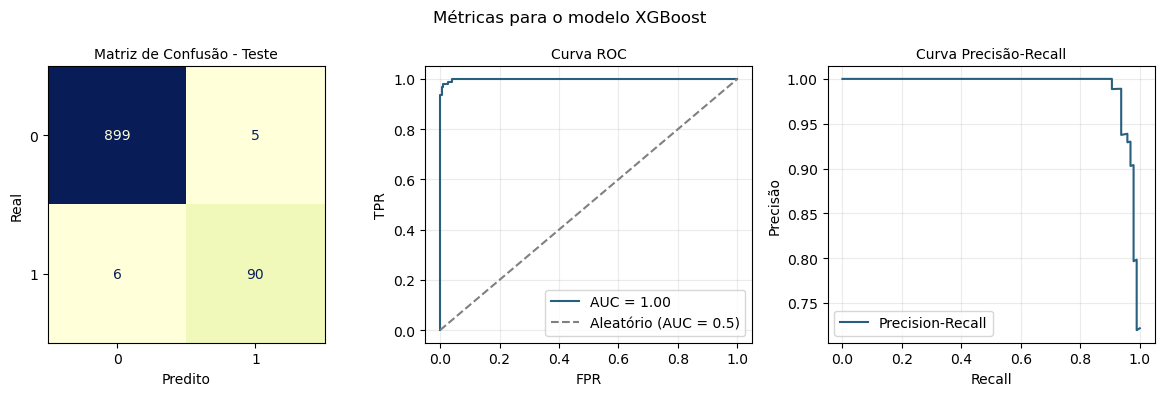

🔍 SVC 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.96      0.79      0.87        96

    accuracy                           0.98      1000
   macro avg       0.97      0.89      0.93      1000
weighted avg       0.98      0.98      0.98      1000

ROC AUC score: 0.9933


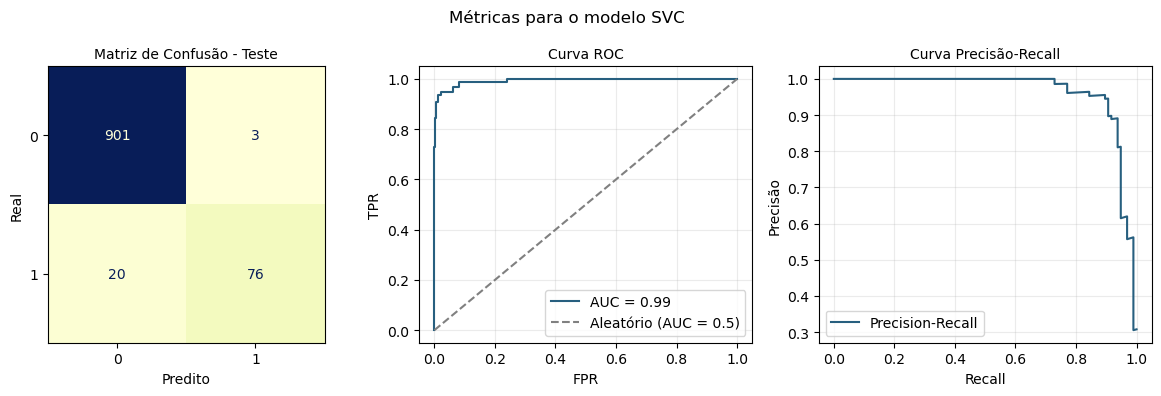

🔍 NaiveBayes 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       904
           1       0.53      0.64      0.58        96

    accuracy                           0.91      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.92      0.91      0.91      1000

ROC AUC score: 0.9401


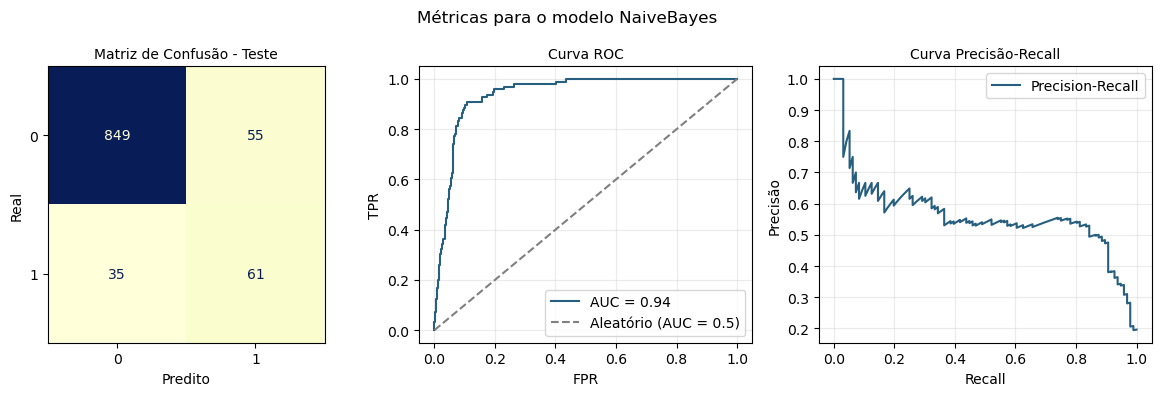

🔍 RidgeClassifier 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       904
           1       0.93      0.29      0.44        96

    accuracy                           0.93      1000
   macro avg       0.93      0.64      0.70      1000
weighted avg       0.93      0.93      0.91      1000

ROC AUC score: 0.9624


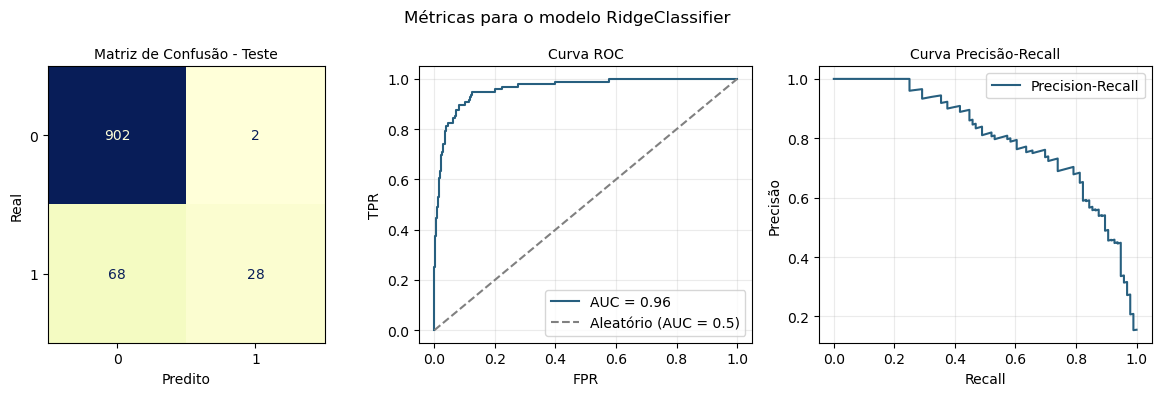

In [240]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(random_state=42)
}

# Loop para treinar e avaliar todos os modelos
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Alguns modelos não possuem predict_proba (como RidgeClassifier)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        # Alternativa para gerar "probabilidades" via decision_function normalizada
        scores = pipeline.decision_function(X_test)
        y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())

    print(f'🔍 {model_name} \n{classification_report(y_test, y_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_pred_proba):.4f}')

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    plt.suptitle(f'Métricas para o modelo {model_name}')

    # Matriz de Confusão
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax=ax[0])
    ax[0].set_title('Matriz de Confusão - Teste', fontsize=10)
    ax[0].set_xlabel('Predito')
    ax[0].set_ylabel('Real')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    ax[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color=paleta[4])
    ax[1].plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)', color='gray')
    ax[1].set_title('Curva ROC', fontsize=10)
    ax[1].set_xlabel('FPR')
    ax[1].set_ylabel('TPR')
    ax[1].legend(loc='lower right')
    ax[1].grid(alpha=0.25)

    # Curva Precisão-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ax[2].plot(recall, precision, label='Precision-Recall', color=paleta[4])
    ax[2].set_title('Curva Precisão-Recall', fontsize=10)
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precisão')
    ax[2].legend(loc='best')
    ax[2].grid(alpha=0.25)

    plt.tight_layout()
    plt.show()

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(random_state=42)
}

resumo_metricas = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    elif hasattr(pipeline.named_steps['classifier'], "decision_function"):
        scores = pipeline.decision_function(X_test)
        y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        y_pred_proba = None
    
    resumo_metricas.append({
        'Modelo': model_name,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score (macro avg)': f1_score(y_test, y_pred, average="macro"),
        'F1-score (weighted)': f1_score(y_test, y_pred, average="weighted"),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    })

df_metricas = pd.DataFrame(resumo_metricas)
df_metricas = df_metricas.sort_values(by='F1-score (macro avg)', ascending=False).reset_index(drop=True)

df_metricas

,Modelo,Acurácia,Precisão,Recall,F1-score (macro avg),F1-score (weighted),ROC AUC
0,RandomForest,0.992,0.958333,0.958333,0.976954,0.992000,0.998473
1,XGBoost,0.989,0.947368,0.937500,0.968164,0.988974,0.998928
2,DecisionTree,0.987,0.910891,0.958333,0.963400,0.987147,0.974189
3,SVC,0.977,0.962025,0.791667,0.927984,0.975990,0.993305
4,AdaBoost,0.969,0.842105,0.833333,0.910280,0.968927,0.984796
5,KNN,0.968,0.970588,0.687500,0.893724,0.965512,0.947905
6,LogisticRegression,0.957,0.827160,0.697917,0.866737,0.955355,0.955015
7,NaiveBayes,0.910,0.525862,0.635417,0.762568,0.913742,0.940139
8,RidgeClassifier,0.930,0.933333,0.291667,0.703546,0.912899,0.962401


### Resumo dos Modelos Avaliados

- **RandomForest e XGBoost** foram os melhores modelos:
  - Alta acurácia (~0.99) e ROC AUC (~0.998).
  - Excelente equilíbrio entre precisão e recall.

- **DecisionTree e SVC** também tiveram ótimo desempenho:
  - DecisionTree com alto recall.
  - SVC com excelente precisão e separação de classes (ROC AUC > 0.99).

- **AdaBoost e KNN** tiveram desempenho mediano:
  - AdaBoost foi equilibrado.
  - KNN teve alta precisão, mas recall mais baixo.

- **Modelos com desempenho mais fraco**:
  - **LogisticRegression**: bom baseline, mas recall limitado.
  - **NaiveBayes**: baixa precisão.
  - **RidgeClassifier**: muito baixo recall, mesmo com boa precisão.